**LAB-06:  Multi-Dimensional Scaling (MDS)**

---



* Created Date: 28.03.2024
* Created By: Blessy Louis(2348416)
* edited on: 28.0.2024

# **Import Libraries**



1. `numpy` (`import numpy as np`): NumPy is a fundamental package for scientific computing with Python. It provides support for arrays, matrices, and mathematical functions to operate on these arrays efficiently. In the code, NumPy is used to handle numerical operations, such as extracting values from the dataset and performing calculations.

2. `pandas` (`import pandas as pd`): Pandas is a powerful library for data manipulation and analysis in Python. It offers data structures and functions to work with structured data, such as dataframes (similar to tables in a database or spreadsheet). In the code, Pandas is used to read, manipulate, and preprocess the dataset.

3. `matplotlib.pyplot` (`import matplotlib.pyplot as plt`): Matplotlib is a plotting library for Python that provides a MATLAB-like interface for creating static, interactive, and animated visualizations. The `pyplot` module in Matplotlib provides a convenient way to create plots and visualizations. In the code, Matplotlib is used to visualize the results of the MDS algorithm by creating scatter plots.

4. `sklearn.manifold.MDS` and `sklearn.metrics.pairwise_distances`: These are modules from scikit-learn, a popular machine learning library for Python. `sklearn.manifold.MDS` implements Multi-Dimensional Scaling (MDS), a technique for dimensionality reduction that aims to preserve the pairwise distances between data points in the reduced-dimensional space. `sklearn.metrics.pairwise_distances` is used to compute pairwise distances between data points, which is a required input for MDS.

Overall, these libraries provide essential functionality for data manipulation, visualization, and dimensionality reduction, enabling the implementation of Multi-Dimensional Scaling and visualization of the results in the code.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

# **Load Dataset**

The data  used for this analysis represents information about two different species of the rock crab, specifically *Leptograpsus variegatus*. Each row in the dataset corresponds to an individual crab, and the columns represent various features associated with each crab. Here's a description of each column in the dataset:

- `sp`: Species of the crab, denoted by color (O for orange, B for blue).
- `sex`: Sex of the crab (M for male, F for female).
- `index`: Serial numbers or identifiers for the crabs.
- `FL`: Front lip measurement of the crab.
- `RW`: Rear width measurement of the crab.
- `CL`: Carapace length measurement of the crab.
- `CW`: Carapace width measurement of the crab.
- `BD`: Body depth measurement of the crab.

These measurements are likely taken as morphological characteristics of the crabs, often used in biological studies for species identification, classification, or understanding variations within and between species.

The dataset contains both categorical (species, sex) and numerical (measurements) data, which are typical in biological datasets.

In [ ]:
df=pd.read_csv('crab.csv')


pd.read_csv is a function provided by the Pandas library, which is used to read data from a CSV (Comma Separated Values) file and create a DataFrame, which is a two-dimensional labeled data structure with columns of potentially different types, similar to a spreadsheet or SQL table.

# **EDA**


**Displaying first 5 rows of the dataset**

In [ ]:
df.head()

sp sex  index   FL   RW    CL    CW   BD
0  B   M      1  8.1  6.7  16.1  19.0  7.0
1  B   M      2  8.8  7.7  18.1  20.8  7.4
2  B   M      3  9.2  7.8  19.0  22.4  7.7
3  B   M      4  9.6  7.9  20.1  23.1  8.2
4  B   M      5  9.8  8.0  20.3  23.0  8.2

 Here, in the first row , we see that:
* sp ='B': indicating that this particular row deals with the details about the blue species of crab.
* sex='M' : indicates that its a male crab.
* index=1 : Is the uniques serial number of that particular cracb.
* FL=8.1: The front lip measurements of this particular crab is 8.1cm
* RW=6.7: The rear width measurement is 6.7cm.
* CL=16.1:Carapace length  measurements is 16.1 cm.
* CW=19.0: The Carapace width measurements is 19cm
* BD=7.0: the body depth is 7.cms


In [ ]:
df.shape

(200, 8)

The dataset contains 200 rows and 8 features/cloumns


---


**Data Description: Features in the data**

In [ ]:
df.columns

Index(['sp', 'sex', 'index', 'FL', 'RW', 'CL', 'CW', 'BD'], dtype='object')

**Checking for null values**

In [ ]:
df.isnull().sum()

sp       0
sex      0
index    0
FL       0
RW       0
CL       0
CW       0
BD       0
dtype: int64

clearly , we see that the dataset have no null values , since the count of the number of null values for each feature is zero.

**Displaying the information about the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sp      200 non-null    object 
 1   sex     200 non-null    object 
 2   index   200 non-null    int64  
 3   FL      200 non-null    float64
 4   RW      200 non-null    float64
 5   CL      200 non-null    float64
 6   CW      200 non-null    float64
 7   BD      200 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 12.6+ KB


The provided information appears to be the output of `DataFrame.info()` method applied to a Pandas DataFrame. This method provides a concise summary of the DataFrame, including the range of indices, the total number of entries, and information about each column.

Here's what each part of the output means:

- **RangeIndex:** Indicates that the DataFrame has 200 entries (rows) with index values ranging from 0 to 199.

- **Data columns (total 8 columns):** Indicates that there are 8 columns in the DataFrame.

- **# Column:** The index or position of each column in the DataFrame.

- **Column Name:** The name of each column.

- **Non-Null Count:** The number of non-null (non-missing) values in each column. In this case, all columns have 200 non-null values, indicating that there are no missing values in the DataFrame.

- **Dtype:** The data type of each column. In this case:
  - `object`: Indicates categorical or string data type.
  - `float64`: Indicates floating-point numeric data type.
  - `int64`: Indicates integer numeric data type.

- **Memory Usage:** Indicates the memory space used by the DataFrame, which is approximately 12.6 KB in this case.

This summary provides essential information about the structure and properties of the DataFrame, including the data types of each column and memory usage, which can be useful for data exploration and analysis.

### **Univariate Analysis**

Numerical Variables:

**Understanding some  basic descriptive statistics of the dataset**

In [ ]:
df.describe()

index          FL         RW          CL          CW          BD
count  200.000000  200.000000  200.00000  200.000000  200.000000  200.000000
mean    25.500000   15.583000   12.73850   32.105500   36.414500   14.030500
std     14.467083    3.495325    2.57334    7.118983    7.871955    3.424772
min      1.000000    7.200000    6.50000   14.700000   17.100000    6.100000
25%     13.000000   12.900000   11.00000   27.275000   31.500000   11.400000
50%     25.500000   15.550000   12.80000   32.100000   36.800000   13.900000
75%     38.000000   18.050000   14.30000   37.225000   42.000000   16.600000
max     50.000000   23.100000   20.20000   47.600000   54.600000   21.600000

FL: This column represents the measurement of the front lip of the crab. From the summary statistics:

* Count: There are 200 non-null entries for this column.
* Mean: The average measurement of the front lip is approximately 15.583.
* Standard Deviation (Std): The standard deviation indicates the amount of variation or dispersion in the measurements around the mean. A higher standard deviation suggests more variability in the measurements.
Min: The smallest measurement of the front lip is 7.2.
* 25% (First Quartile): 25% of the measurements fall below this value, which is approximately 12.9.
* Median (50% or Second Quartile): Also known as the median, it represents the middle value of the sorted measurements. In this case, it's approximately 15.55.
* 75% (Third Quartile): 75% of the measurements fall below this value, which is approximately 18.05.
* Max: The largest measurement of the front lip is 23.1.

 A similar description follows for all the other columns , since the column Index indicates serial numbers we are not interested in the statistical description of it.

**Visualize distribution of different numerical data**

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['BD'], bins=30, density=True, alpha=0.6, color='orange')
plt.title('Histogram of  Body Depth')
plt.xlabel('BD')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Clearly we see that the distribution of the measurements of the body dept of different crabs is alomst symmetric but slightly right skewed , and also  the  distribution is slightly platykurtic (flatter than a normal distribution)

In [ ]:
mean = np.mean(df['BD'])
std_dev = np.std(df['BD'])
skewness = np.mean((df['BD'] - mean) ** 3) / (std_dev ** 3)
kurtosis = np.mean((df['BD'] - mean) ** 4) / (std_dev ** 4) - 3

print("Descriptive Statistics:")
print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

Descriptive Statistics:
Mean: 14.03
Standard Deviation: 3.42
Skewness: 0.02
Kurtosis: -0.57


* Skewness (0.02): The data distribution is very close to symmetrical. Since the  skewness is very close to 0, it suggests the data is nearly symmetrical.
* Kurtosis (-0.57): The data distribution is slightly platykurtic (flatter than a normal distribution). In this case, the negative kurtosis suggests the data has a flatter peak than a normal distribution.


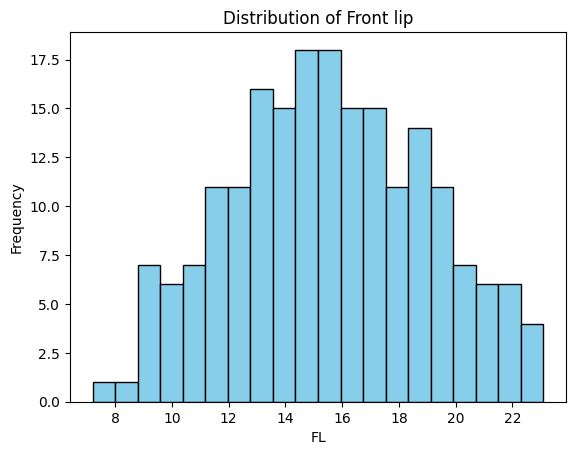

In [ ]:
plt.hist(df['FL'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('FL')
plt.ylabel('Frequency')
plt.title('Distribution of Front lip')
plt.show()

 The  graph reprents a perfect symmetry and leptokurtic in natire

<ipython-input-15-cb061adbe7d3>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['RW'], color='orange', shade=True)


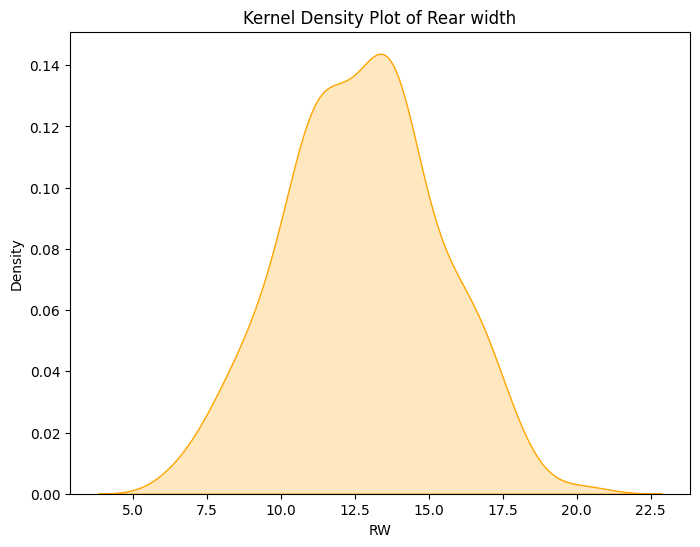

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['RW'], color='orange', shade=True)
plt.xlabel('RW')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Rear width')
plt.show()

 The above Kernel density plot depicts  symmetric but slightly right skewed and very leptokurtic in nature.

Text(0.5, 1.0, 'Histogram of Carapace Length')

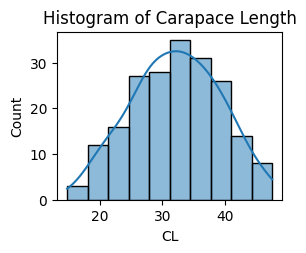

In [ ]:
plt.subplot(2, 2, 1)
sns.histplot(df['CL'], kde=True)
plt.title('Histogram of Carapace Length')

 The distribution of Carapace length is symmetric but slightly left skewed and  platykurtic in nature

Text(0.5, 1.0, 'QQ Plot of Carapace Width')

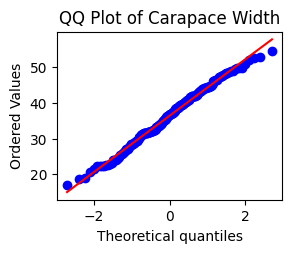

In [ ]:
from scipy import stats
plt.subplot(2, 2, 3)
stats.probplot(df['CW'], dist="norm", plot=plt)
plt.title('QQ Plot of Carapace Width')

We, clearly observe that , all point follow the straight line , hence we can conclude that the  carapace width  is normally distributed

### **Univariate Analysis**

Categorical Variables:

In [ ]:
Sp_freq = df['sp'].value_counts(normalize=True)
print(Sp_freq)

B    0.5
O    0.5
Name: sp, dtype: float64


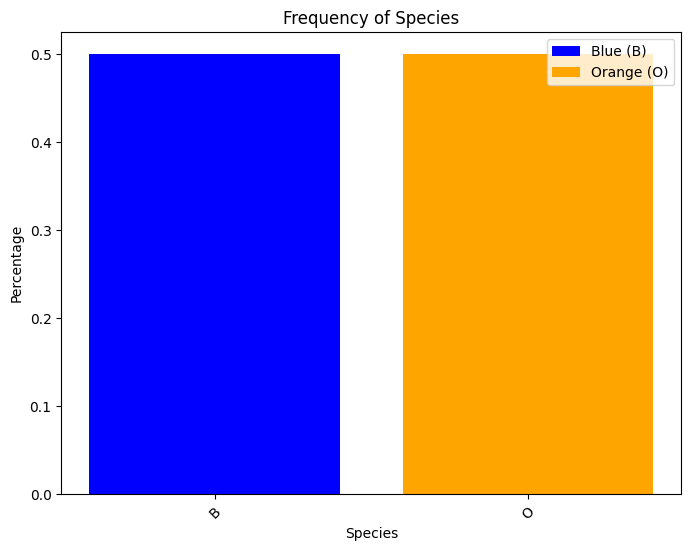

In [ ]:
colors = {'B': 'blue', 'O': 'orange'}

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(Sp_freq.index, Sp_freq.values, color=[colors[sp] for sp in Sp_freq.index])

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Percentage')
plt.title('Frequency of Species')
plt.xticks(rotation=45)

# Add legend
legend_labels = ['Blue (B)', 'Orange (O)']
plt.legend(bars, legend_labels)

plt.show()

 the distribution of  both the species in our dataset  is teh same

In [ ]:
sex_freq = df['sex'].value_counts(normalize=True)
print(sex_freq)

M    0.5
F    0.5
Name: sex, dtype: float64


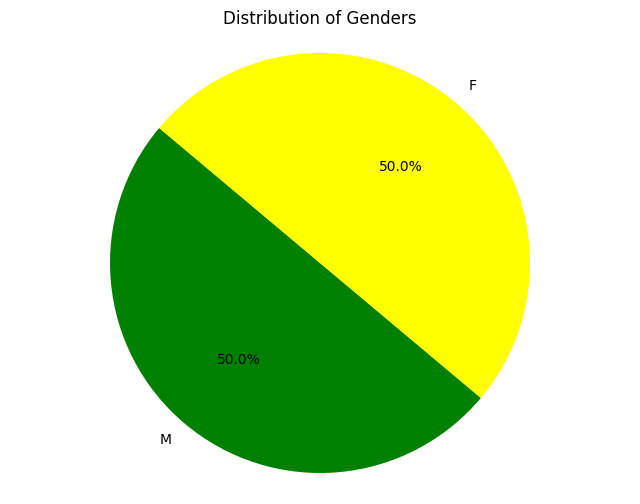

In [ ]:
labels = sex_freq.index
sizes = sex_freq.values

# Define colors for each section of the pie chart
colors = ['green', 'yellow']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Genders')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

the distribution of male crabs and female crabs are also the same , they are equally distributed

### **Bivariate Analysis:**

* Explore relationships between pairs of numerical variables:

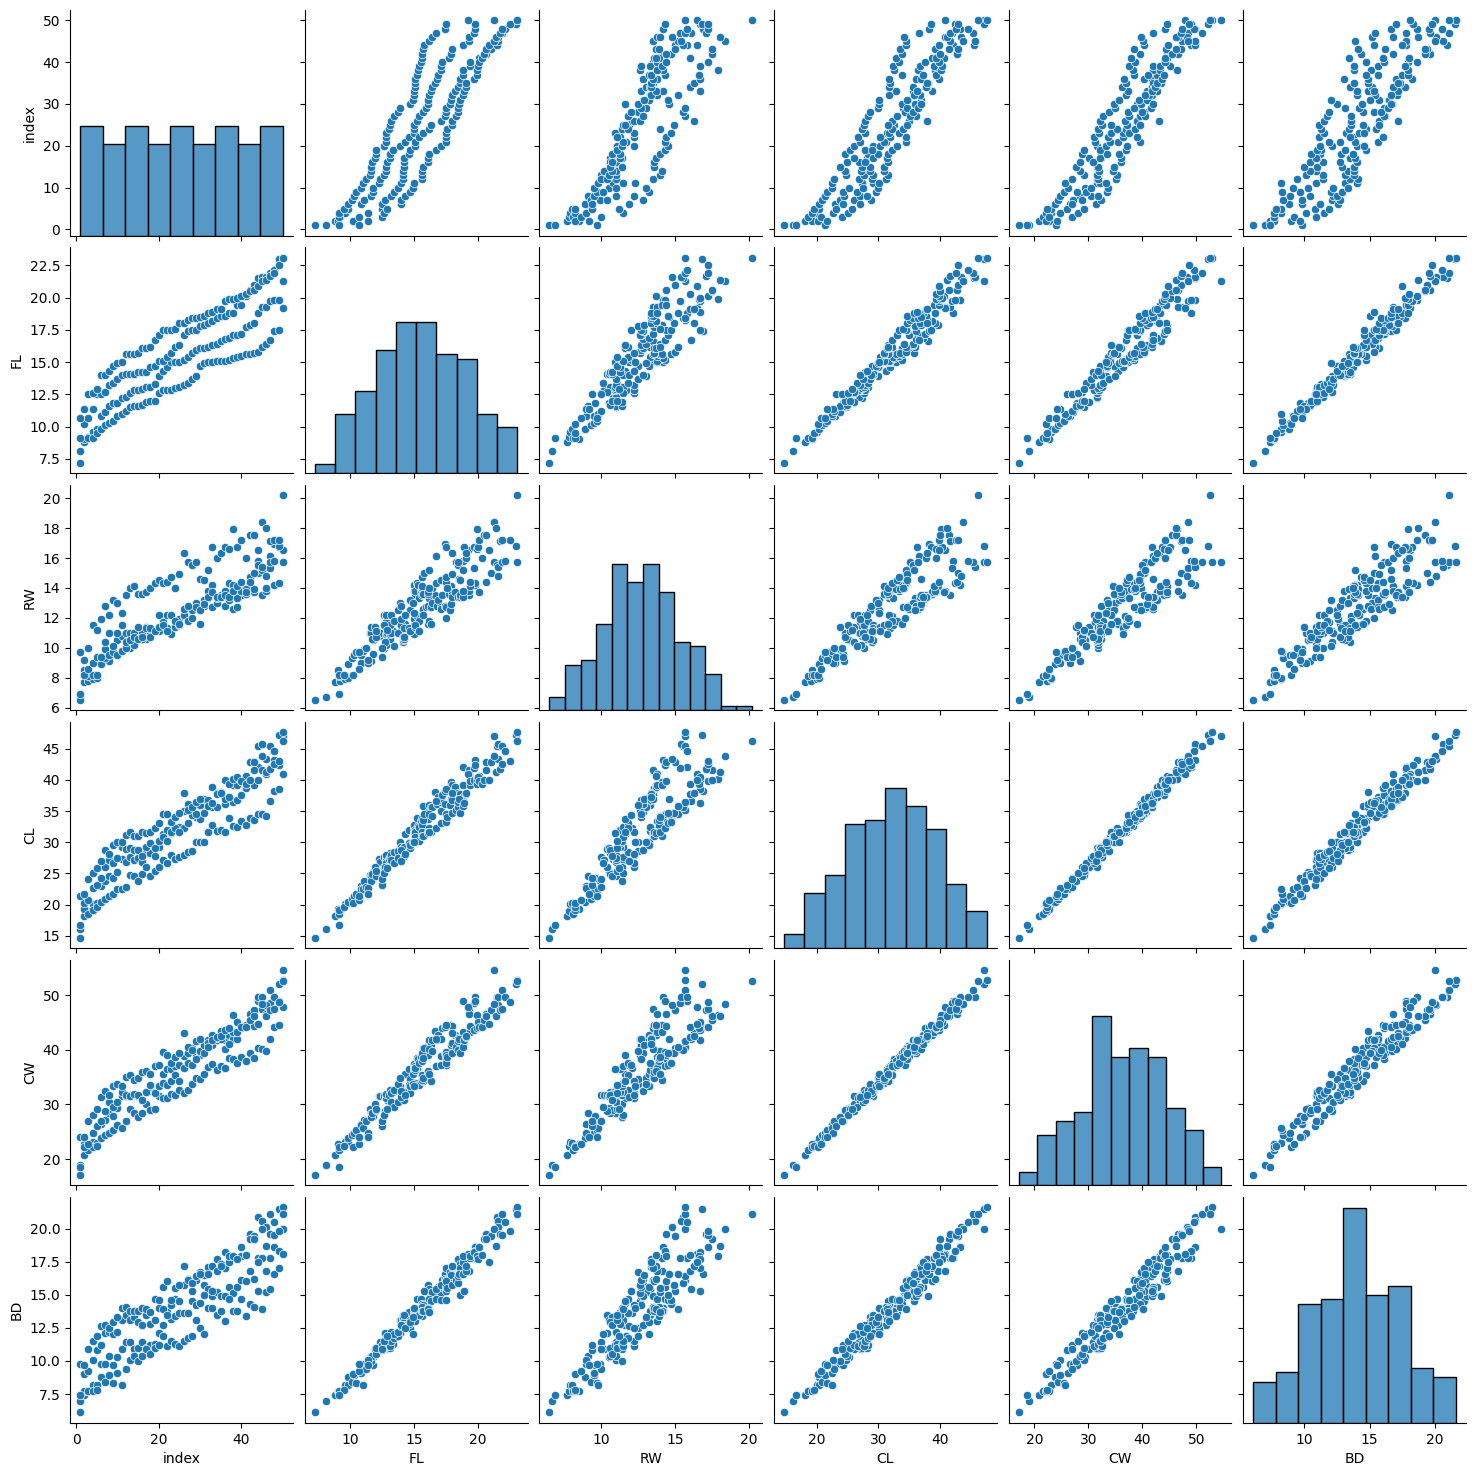

In [ ]:
sns.pairplot(df)
plt.show()

From the above pairplot , we clearly see that almost all the feautures in the dataset are linearly and highly positvely correlated

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

          index        FL        RW        CL        CW        BD
index  1.000000  0.862876  0.840040  0.911436  0.928248  0.864459
FL     0.862876  1.000000  0.906988  0.978842  0.964956  0.987627
RW     0.840040  0.906988  1.000000  0.892743  0.900402  0.889205
CL     0.911436  0.978842  0.892743  1.000000  0.995023  0.983204
CW     0.928248  0.964956  0.900402  0.995023  1.000000  0.967812
BD     0.864459  0.987627  0.889205  0.983204  0.967812  1.000000


<ipython-input-29-becb50483c66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


* Strong Positive Correlation:

Variables with correlation coefficients close to 1 indicate a strong positive linear relationship. For example:
FL and CL have a correlation coefficient of approximately 0.9788, indicating a strong positive correlation. This suggests that as the front lip measurement (FL) increases, the carapace length (CL) also tends to increase, and vice versa.
Similarly, CW and CL have a correlation coefficient of approximately 0.9950, indicating a very strong positive correlation. This suggests a similar relationship between carapace width (CW) and carapace length (CL).
* Strong Negative Correlation:

There doesn't appear to be any strong negative correlations (coefficients close to -1) in the provided matrix. All the coefficients are positive or close to zero.
* Weak Correlation:

Some variables may have weaker correlations compared to others. For example:
RW and BD have a correlation coefficient of approximately 0.8892, indicating a moderate positive correlation.
FL and RW have a correlation coefficient of approximately 0.9069, indicating a moderate positive correlation.

<ipython-input-31-cf2184b7ac43>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


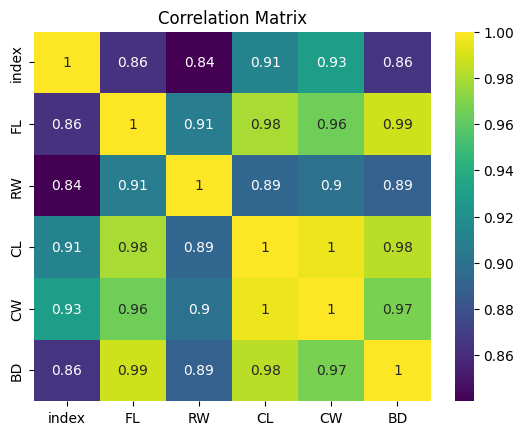

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

# **MDS**

**Performing mds and visualizing using scatterplot of dimension = 2:**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


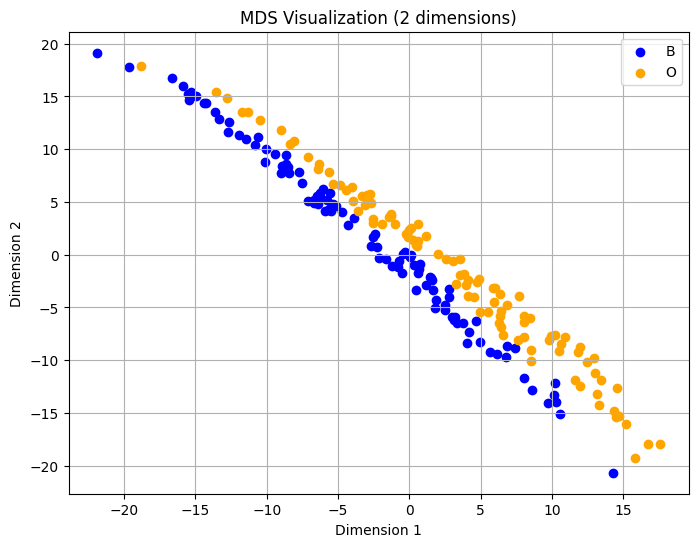

In [ ]:

# Define colors for each species
colors = {'B': 'blue', 'O': 'orange'}

# Define a function to perform MDS and visualize the results
def visualize_mds(data, k):
    # Extracting necessary columns for MDS
    features = data[['FL', 'RW', 'CL', 'CW', 'BD']].values

    # Calculating pairwise distances
    distances = pairwise_distances(features, metric='euclidean')

    # Applying MDS to reduce dimensionality
    mds = MDS(n_components=k, dissimilarity='precomputed', random_state=42)
    results = mds.fit_transform(distances)

    # Visualizing the results
    plt.figure(figsize=(8, 6))
    for sp, color in colors.items():
        plt.scatter(results[data['sp'] == sp, 0], results[data['sp'] == sp, 1], c=color, label=sp)

    plt.title(f'MDS Visualization ({k} dimensions)')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# User-defined parameter for number of dimensions
k = 2

# Perform MDS and visualize the results
visualize_mds(df, k)


In a 2D MDS plot, each point represents an observation or data point from your dataset, projected onto a two-dimensional space.
* Proximity of Points: The proximity of points in the plot indicates their similarity or dissimilarity. Points that are closer together represent observations that are more similar to each other, while points that are farther apart represent observations that are more dissimilar. In this case the observations of both the species are closer to each other  indicating that both species have similar measurements .

Clusters: If there are clusters of points in the plot, it suggests that there are groups of observations that are more similar to each other than to observations in other clusters. This can be indicative of underlying structures or patterns in the data. Since, in our case we do not have any clusters , there is no similarities between the groups themselves

Outliers: Points that are far away from other points may represent outliers or observations that are distinct from the rest of the dataset. In this case there are few countable outliers , which can be ignored

**Performing mds and visualizing using scatterplot of dimension = 3**

[[ 0.          2.9816103   4.7833043  ... 44.33677931 45.68533682
  51.32562713]
 [ 2.9816103   0.          1.90525589 ... 41.42559595 42.77990182
  48.40382216]
 [ 4.7833043   1.90525589  0.         ... 39.63395009 40.97987311
  46.60879745]
 ...
 [44.33677931 41.42559595 39.63395009 ...  0.          1.51657509
   7.20902213]
 [45.68533682 42.77990182 40.97987311 ...  1.51657509  0.
   5.97745765]
 [51.32562713 48.40382216 46.60879745 ...  7.20902213  5.97745765
   0.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


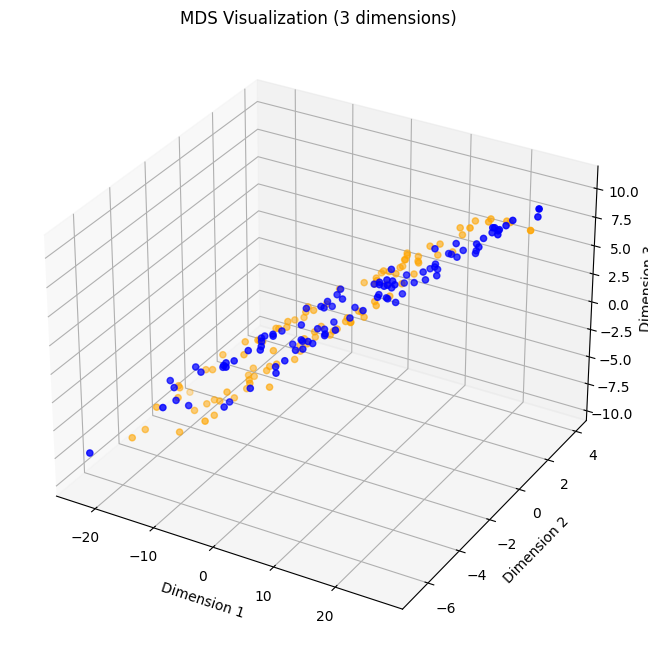

In [ ]:
# Extracting necessary columns for MDS
features = df[['FL', 'RW', 'CL', 'CW', 'BD']].values

# Calculating pairwise distances
distances = pairwise_distances(features, metric='euclidean')
print(distances)

# Applying MDS to reduce dimensionality to 3 dimensions
mds = MDS(n_components=3, dissimilarity='precomputed', random_state=42)
results = mds.fit_transform(distances)

# Visualizing the results in 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot points
ax.scatter(results[:, 0], results[:, 1], results[:, 2], c=df['sp'].map({'O': 'orange', 'B': 'blue'}))




# Adding axis labels and title
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.title('MDS Visualization (3 dimensions)')

plt.show()


In a 3D MDS plot, each point represents an observation or data point from your dataset, projected onto a three-dimensional space.
* Proximity of Points: Similar to the 2D plot, the proximity of points in the 3D plot indicates their similarity or dissimilarity. Points that are closer together represent observations that are more similar to each other. We see that like  the 2D plot here also the observations are  closer to each other indicating more similarity

* Clusters: Clusters in a 3D plot can be more complex than in a 2D plot, as they can involve relationships in three dimensions. Clusters may be easier to identify visually if they form distinct structures in the 3D space. Like 2D plot there are no clusters in our case

* Depth: The third dimension adds depth to the plot, allowing for a more nuanced representation of the data. Observations that are similar in the first two dimensions but differ in the third dimension may represent variations that are not apparent in a 2D plot.

* Rotation: Since 3D plots can be rotated, exploring the plot from different angles can reveal additional insights about the relationships between points and the structure of the data.

**Performing mds and visualizing using scatterplot of dimension = 4**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


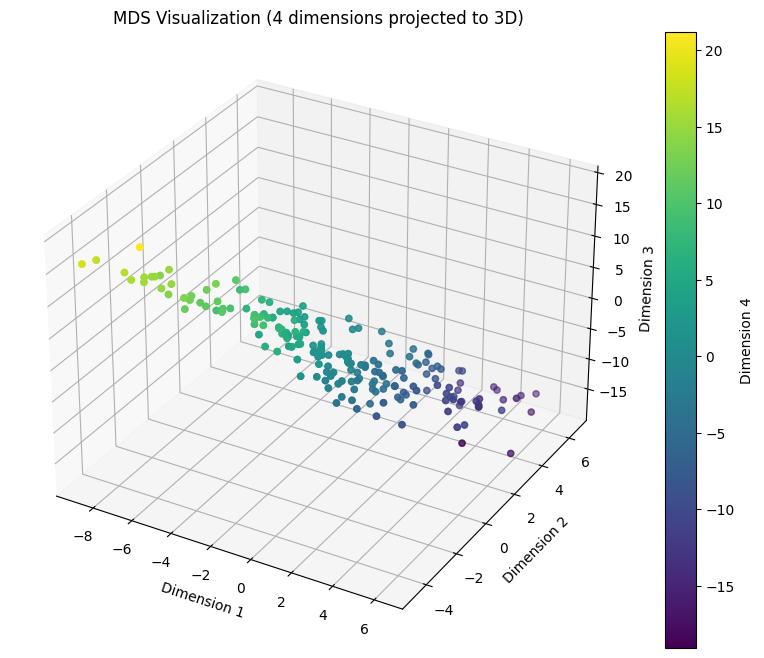

In [ ]:
# Extracting necessary columns for MDS
features = df[['FL', 'RW', 'CL', 'CW', 'BD']].values

# Calculating pairwise distances
distances = pairwise_distances(features, metric='euclidean')

# Applying MDS to reduce dimensionality to 4 dimensions
mds = MDS(n_components=4, dissimilarity='precomputed', random_state=42)
results = mds.fit_transform(distances)

# Visualizing the results in 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot points
ax.scatter(results[:, 0], results[:, 1], results[:, 2], c=results[:, 3], cmap='viridis')

# Adding color bar for the fourth dimension
cbar = plt.colorbar(ax.scatter(results[:, 0], results[:, 1], results[:, 2], c=results[:, 3], cmap='viridis'))
cbar.set_label('Dimension 4')

# Adding axis labels and title
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.title('MDS Visualization (4 dimensions projected to 3D)')

plt.show()



To visualize the data in four dimensions using Multi-Dimensional Scaling (MDS), you would need to specify n_components=4 in the MDS function. However, since we cannot directly visualize four dimensions in a single plot, you would typically reduce the dimensionality to either 2D or 3D for visualization purposes. Here' we have made 4D and then project it onto a 3D scatter plot